### Setup Steps:

In [1]:
#@title Download Data
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/Acoustic_Extinguisher_Fire_Dataset.xlsx
print("Data downloaded successfully!")

Data downloaded successfully!


### Import Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                 # For plotting data
import seaborn as sns                                           # For plotting data
from sklearn.model_selection import train_test_split            # For train/test splits
from sklearn.neighbors import KNeighborsClassifier              # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold         # Feature selector
from sklearn.pipeline import Pipeline                           # For setting up pipeline

# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV                # For optimization

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [3]:
df = pd.read_excel('Acoustic_Extinguisher_Fire_Dataset.xlsx', sheet_name='A_E_Fire_Dataset')
# Shape of dataframe
df.shape

(17442, 7)

### Data Exploration

In [4]:
# Show first few rows of dataframe
df.head(8)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
5,1,gasoline,10,109,7.8,66,1
6,1,gasoline,10,103,9.7,65,1
7,1,gasoline,10,95,12.0,60,1


From above it can be seen that:

- There are 6 independent variables
- `FUEL` is a categorical feature
- Every other feature is numerical
- `STATUS` is the dependent variable
- It is a binary classification problem

### Segregating the dataframe into independent and dependent features

In [5]:
# The data matrix X
X = df.iloc[:, :-1]
# The labels
y = (df.iloc[:,-1:])

X.shape, y.shape

((17442, 6), (17442, 1))

In [6]:
# Independent features
X

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,gasoline,10,96,0.0,75
1,1,gasoline,10,96,0.0,72
2,1,gasoline,10,96,2.6,70
3,1,gasoline,10,96,3.2,68
4,1,gasoline,10,109,4.5,67
...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5
17438,7,lpg,190,84,2.0,4
17439,7,lpg,190,80,1.5,3
17440,7,lpg,190,76,0.4,2


### Exploring the unique categories in categorical feature

In [7]:
# Unique values in FUEL column
X['FUEL'].value_counts()

gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: FUEL, dtype: int64

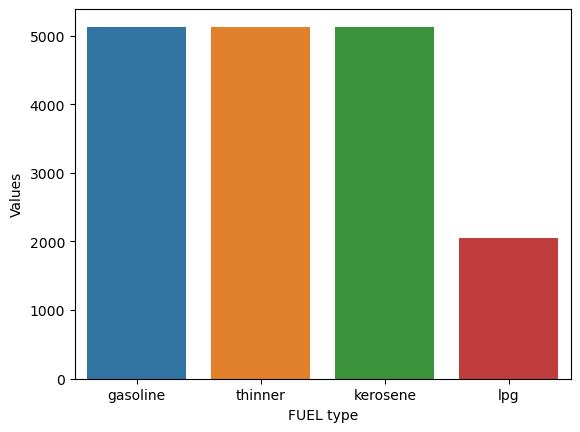

In [8]:
# Plot unique values in FUEL column
uniques = X['FUEL'].value_counts()
sns.barplot(x = uniques.index, y = uniques.values)
plt.xlabel("FUEL type")
plt.ylabel("Values")
plt.show()

### Encoding the Categorical Feature

In [9]:
# Ordinal encode input variable
ordinal = OrdinalEncoder()
X['FUEL'] = ordinal.fit_transform(X[['FUEL']])

In [10]:
X.tail(110)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
17332,7,2.0,170,78,1.4,2
17333,7,2.0,170,76,0.0,1
17334,7,2.0,180,104,0.0,75
17335,7,2.0,180,97,0.0,72
17336,7,2.0,180,96,0.0,70
...,...,...,...,...,...,...
17437,7,2.0,190,86,2.2,5
17438,7,2.0,190,84,2.0,4
17439,7,2.0,190,80,1.5,3
17440,7,2.0,190,76,0.4,2


After ordinal encoding, all the features are numerical in nature now.

In [11]:
# Prediction features
X.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0.0,10,96,0.0,75
1,1,0.0,10,96,0.0,72
2,1,0.0,10,96,2.6,70
3,1,0.0,10,96,3.2,68
4,1,0.0,10,109,4.5,67


In [12]:
# Target feature: Extinction Status
y

,STATUS
0,0
1,1
2,1
3,1
4,1
...,...
17437,0
17438,0
17439,0
17440,0


### Split the data into train and test sets

In [13]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,                  # predictors
                                                    y,                  # labels
                                                    test_size=1/3,      # test set size 
                                                    random_state=0)     # set random number generator seed for reproducibility 

print(X_train.shape)
print(X_test.shape)

(11628, 6)
(5814, 6)


### A Classifier Without a Pipeline and Optimization

First, let’s just check how the k-nearest neighbor performs on the training and test sets. This would give us a baseline for performance.



In [14]:
# Instantiate KNN classifier and fit on train set
knn = KNeighborsClassifier().fit(X_train, y_train)

# Performance on train and test sets
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

Training set score: 0.9425524595803234
Test set score: 0.9157206742346061


### Setting Up a Machine Learning Pipeline

- **Scaler:** For pre-processing data, i.e., transform the data to zero mean and unit variance using the `StandardScaler()`.

- **Feature selector:** Use `VarianceThreshold()` for discarding features whose variance is less than a certain defined threshold. 

- **Classifier:** `KNeighborsClassifier()`, which implements the k-nearest neighbor classifier and selects the class of the majority k points, which are closest to the test example.

In [15]:
# Setup pipeline
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('selector', VarianceThreshold()), 
                 ('classifier', KNeighborsClassifier())
                 ])

In [16]:
# Fit pipeline on train set
pipe.fit(X_train, y_train)
 
# Performance on train and test sets
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.9765221878224974
Test set score: 0.9613003095975232


It can be clearly noticed that setting the pipeline, including `StandardScaler()` and `VarianceThreshold()` has helped train a good model because scores are better both for training and test data when compared with the model without using a pipeline.

### Optimizing and Tuning the Pipeline with GridSearchCV

In the code below, we’ll show the following:

- We can search for the best scalers. Instead of just the `StandardScaler()`, we can try `MinMaxScaler()`, `Normalizer()`, and `MaxAbsScaler()`.

- We can search for the best variance threshold to use in the selector, i.e., `VarianceThreshold()`.

- We can search for the best value of k for the `KNeighborsClassifier()`.

In [17]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()], 
              'selector__threshold': [0, 0.001, 0.01],  
			  'classifier__n_neighbors': [1, 3, 5, 7, 10],           # Number of neighbors to use by default for k-neighbors
			  'classifier__p': [1, 2],                               # Power parameter for the Minkowski metric
			  'classifier__leaf_size': [1, 5, 10, 15]                # Leaf size passed to BallTree or KDTree. This can affect the speed of the
			  }                                                      # construction and query, as well as the memory required to store the tree 

In [18]:
4*3*5*2*4

480

Here, we have passed a list of parameters that the GridsearchCV algorithm will use to come at an optimum solution. It will go through every combination of this parameters to get an optimal solution. So, total iterations here will be 4 $\times$ 3 $\times$ 5 $\times$ 2 $\times$ 4 = 480.

`n_neighbors`, `p` and `leaf_size` are the parameter for `KNeighborsClassifier()`.

To know more about `KNeighborsClassifier()`, refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

In [19]:
# Instantiate GridSearchCV
grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

# Performance on train and test sets
print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

Training set score: 0.9799621603027175
Test set score: 0.9685242518059856


To know more about GridSearchCV, refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).

### Analyzing the Results


In [20]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__leaf_size': 5, 'classifier__n_neighbors': 5, 'classifier__p': 1, 'scaler': MaxAbsScaler(), 'selector__threshold': 0}
Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier', KNeighborsClassifier(leaf_size=5, p=1))])


Another useful technique for analyzing the results is to construct a DataFrame from the `grid.cv_results_` attribute.

In [21]:
# Create a dataframe
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [22]:
result_df.shape

(480, 15)

In [23]:
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__leaf_size,param_classifier__n_neighbors,param_classifier__p,param_scaler,param_selector__threshold,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013174,0.005757,0.139928,0.010900,1,1,1,StandardScaler(),0,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.946508,0.947196,0.946852,0.000344,343
1,0.007212,0.000078,0.128985,0.000847,1,1,1,StandardScaler(),0.001,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.946508,0.947196,0.946852,0.000344,343
2,0.007037,0.000039,0.130403,0.001303,1,1,1,StandardScaler(),0.01,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.946508,0.947196,0.946852,0.000344,343
3,0.007004,0.000115,0.131700,0.000118,1,1,1,MinMaxScaler(),0,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.949776,0.951840,0.950808,0.001032,205
4,0.007125,0.000012,0.129953,0.002071,1,1,1,MinMaxScaler(),0.001,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.949776,0.951840,0.950808,0.001032,205


This DataFrame is very valuable as it shows us the scores for different parameters. The column with the `mean_test_score` is the average of the scores on the test set for all the folds during cross-validation. The DataFrame may be too big to visualize manually, hence, it is always a good idea to plot the results. 

Let’s see how `n_neighbors` affect the performance for different `scalers`, and for different values of `p`.

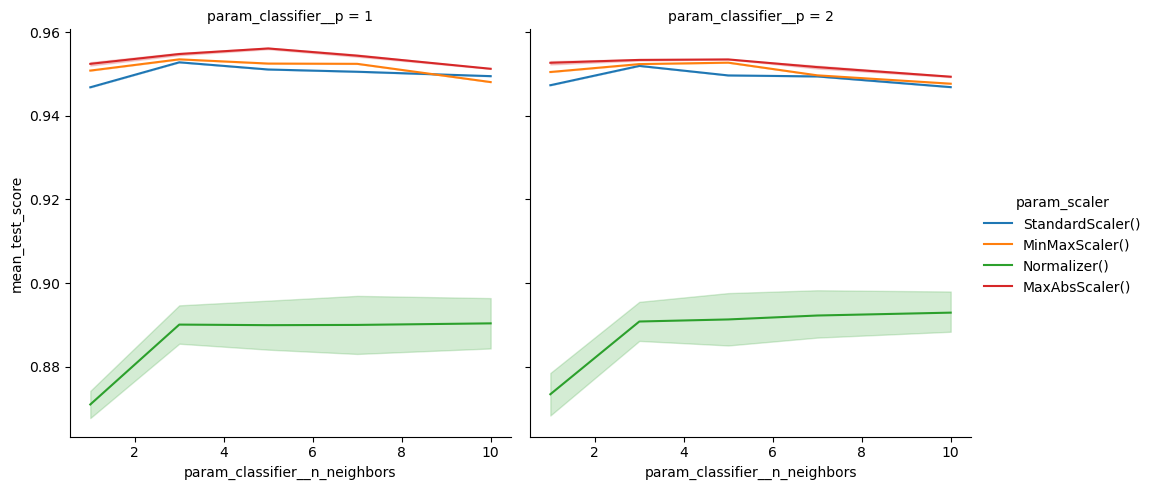

In [24]:
sns.relplot(data = result_df,
            kind = 'line',
			x = 'param_classifier__n_neighbors',
			y = 'mean_test_score',
			hue = 'param_scaler',
			col = 'param_classifier__p')
plt.show()

From the above plots, it can be seen that:

- For both `p = 1` and `2`, worst performing scaler method is `Normalizer()`
- For both `p = 1` and `2`, best performing scaler is `MaxAbsScaler()`
- For `p = 1` and `scaler = MaxAbsScaler()`, there is a peak in `mean_test_score` at `n_neighbors = 5`.

Let’s see how `n_neighbors` affect the performance for different `scalers`, and for different values of `life_size`.

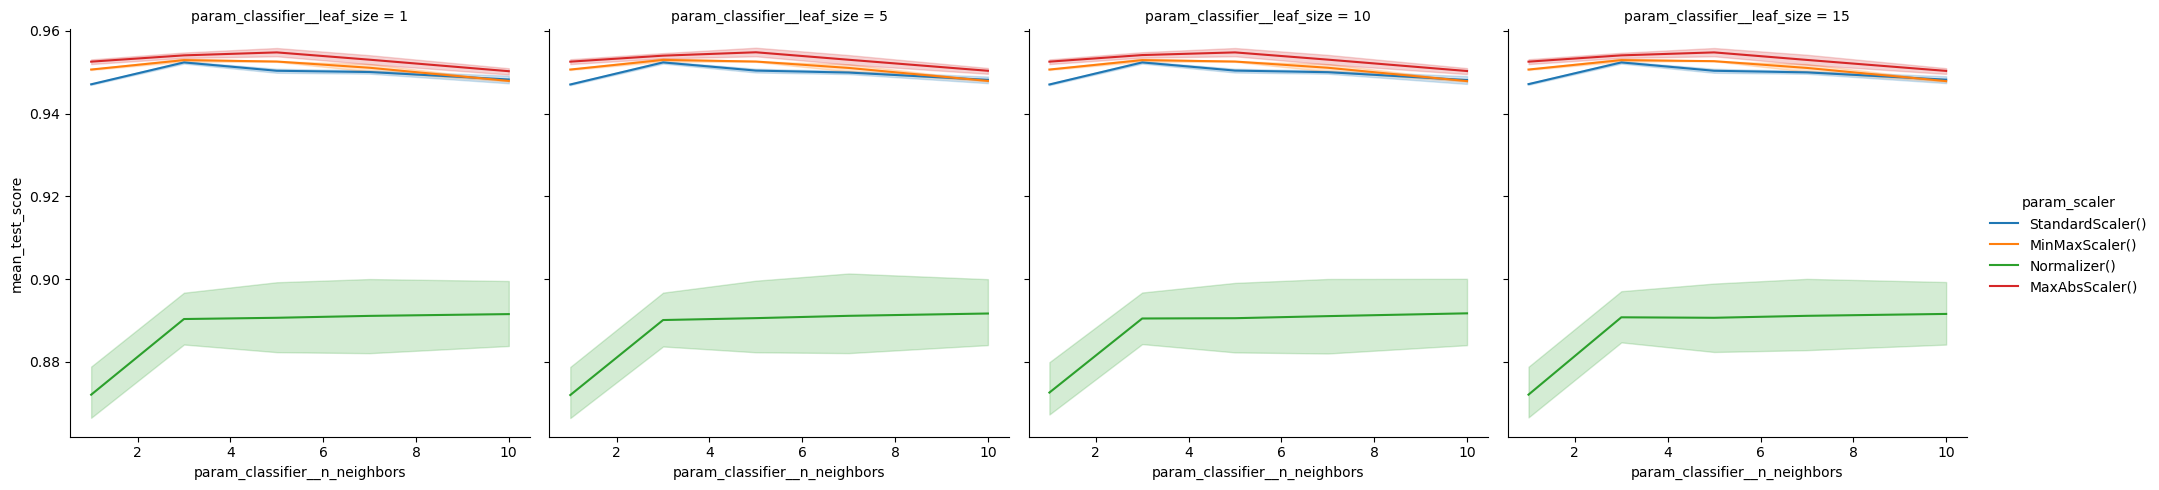

In [25]:
sns.relplot(data = result_df,
            kind = 'line',
            x = 'param_classifier__n_neighbors',
            y = 'mean_test_score',
            hue = 'param_scaler',
            col = 'param_classifier__leaf_size')
plt.show()

- For all the `leaf_size` parameters, that is 1, 5, 10, 15, worst performing scaler method is `Normalizer()`.
- For all the `leaf_size` parameters, best performing scaler is `MaxAbsScaler()`.
- For all the `leaf_size` parameters, there is a peak at `n_neighbors = 5`.

`MaxAbsScaler()` is performing well because it scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be $1.0$. It does not shift or center the data, and thus does not destroy any sparsity.

To know more about `MaxAbsScaler()`, refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler).